In [1]:
# import the relevant modules
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
#Getting Data retrieved in Project_Part1
file='AllData_2.csv'
df_data_orig=pd.read_csv(file)
df_data=df_data_orig.copy()
#delete any unnamed column product of saving DataFrames in range index to csv
df_data.drop(df_data.columns[df_data.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)
df_data.head()

#getting US regions
file='regions.csv'
df_reg_orig=pd.read_csv(file)
df_reg=df_reg_orig.copy()

#Add column Region to the DataFrame
for reg in df_reg.columns:
    #getting the data for the states of New England
    states=df_reg[reg].dropna()
    list_states=list(states.values)

    idx_region=df_data.index[df_data['state'].isin(list_states)]
    df_data.loc[idx_region,'region']=reg


In [3]:
# Getting the data of the years 2001, 2009 and 2018 for EDA
df_data['date']=pd.to_datetime(df_data['date'], format="%Y-%m-%d")
df_data.sort_values(by='region', inplace=True)
df_data.loc[slice(None),'year']=df_data['date'].dt.year.astype(int)

df_data_3years=df_data[(df_data['year']==2018)|(df_data['year']==2009)|(df_data['year']==2001)]

df_describe_3years=df_data_3years.groupby(by=['year', 'region'])['Average retail price of electricity'].describe()

df_describe_3years

count       mean       std    min      25%  \
year region                                                              
2001 East North Central      60.0   6.363167  0.694991   5.05   5.9525   
     East South Central      48.0   5.412292  0.774446   3.90   5.1700   
     Middle Atlantic         36.0   9.615278  1.562334   7.46   8.3400   
     New England             72.0  10.829167  0.877761   9.06  10.3350   
     Pacific Contiguous      36.0   7.328611  2.917074   4.79   5.2200   
     Pacific Noncontiguous   24.0  12.296250  1.821404   9.92  10.5875   
     South Atlantic         108.0   6.475741  0.897809   4.98   5.9375   
     West North Central      84.0   5.916667  0.582625   4.77   5.5075   
     West South Central     144.0   6.293264  1.138263   4.26   5.4275   
2009 East North Central      60.0   8.911167  0.735410   7.29   8.5975   
     East South Central      48.0   8.213542  1.052449   6.04   7.7850   
     Middle Atlantic         36.0  13.155000  2.656145   9.23   9.7800   
     New England             72.0  14.790556  1.862862  12.45  12.9625   
     Pacific Contiguous      36.0   9.064167  3.030099   6.40   6.7100   
     Pacific Noncontiguous   24.0  18.135417  3.385280  14.68  15.1675   
     South Atlantic         108.0  10.137130  2.271255   6.28   8.4075   
     West North Central      84.0   7.437500  0.697731   6.08   6.9375   
     West South Central     144.0   7.860972  1.387660   5.78   6.7625   
2018 East North Central      60.0  10.249000  0.845412   9.12   9.5675   
     East South Central      48.0   9.265625  0.533674   8.24   8.9425   
     Middle Atlantic         36.0  12.711389  2.071065   9.85  10.0975   
     New England             72.0  16.660000  2.069636  12.50  15.0300   
     Pacific Contiguous      36.0  11.192778  3.944227   7.69   8.1000   
     Pacific Noncontiguous   24.0  24.430000  4.942180  19.12  19.5925   
     South Atlantic         108.0  10.174352  1.108793   8.05   9.3775   
     West North Central      84.0   9.724524  0.920402   7.98   8.9125   
     West South Central     144.0   8.685417  1.001902   7.08   7.9375   

                               50%      75%    max  
year region                                         
2001 East North Central      6.400   6.9000   7.78  
     East South Central      5.570   5.8250   6.82  
     Middle Atlantic         9.155  10.8950  13.26  
     New England            10.915  11.3175  13.35  
     Pacific Contiguous      5.555   9.8350  13.47  
     Pacific Noncontiguous  12.275  14.0300  14.56  
     South Atlantic          6.340   7.0925   9.03  
     West North Central      5.885   6.2375   7.28  
     West South Central      6.380   7.1525   8.62  
2009 East North Central      9.150   9.4125  10.09  
     East South Central      8.655   8.9800   9.66  
     Middle Atlantic        14.070  15.3950  16.48  
     New England            14.670  15.7525  18.35  
     Pacific Contiguous      7.455  12.1950  15.00  
     Pacific Noncontiguous  17.275  20.9525  23.57  
     South Atlantic          9.025  12.3125  13.54  
     West North Central      7.425   7.9400   8.82  
     West South Central      7.595   8.7225  11.50  
2018 East North Central      9.800  11.0275  12.25  
     East South Central      9.430   9.6275  10.02  
     Middle Atlantic        13.290  13.9525  16.22  
     New England            17.125  18.3850  19.47  
     Pacific Contiguous      9.035  15.5750  18.73  
     Pacific Noncontiguous  24.370  29.0175  31.49  
     South Atlantic         10.065  10.8875  12.71  
     West North Central      9.660  10.3900  11.63  
     West South Central      8.455   9.1625  11.72

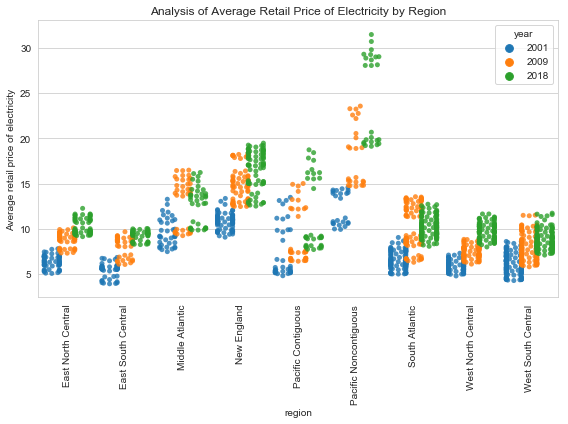

<Figure size 576x432 with 0 Axes>

In [4]:
#Plotting the behavior of Price of Electricity for the years 2001, 2009 and 2018

#Format the size of the figure/plot
width=8
height=6
plt.rcParams['figure.figsize'] = [width, height]

sns.set_style("whitegrid")

g2=sns.swarmplot(x='region', y='Average retail price of electricity', 
               hue='year', data=df_data_3years, alpha=0.8, dodge=True)
#g1=sns.boxplot(x='region', y='Average retail price of electricity', 
#                 hue='year',data=df_data_3years, color='white', dodge=True)




plt.title('Analysis of Average Retail Price of Electricity by Region')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.tight_layout()
plt.savefig('img_part3/price_regions.png')
plt.show()
plt.clf()
plt.rcdefaults() #restore plot default values